```{admonition} Information
__Section__: Attributes selection
__Goal__: Understand which attributes can be useful, useless or even prejudicial for prediction.
__Time needed__: x min
__Prerequisites__: AIS data, basics about machine learning
```

# Attributes selection

For this section, we will see how the selection of the predictive attributes can lead to very different results in the prediction.

Again, you are asked to build a model to predict the width of a ship. You can use any numerical attribute in the dataset. The static dataset is used here.

In [3]:
%run 1-functions.ipynb # this line runs the other functions we will use later on the page

import pandas as pd

static_data = pd.read_csv('./static_data.csv')

## The attributes

First, let's have a look at the list of the numerical attributes we can use in the dataset.

```{toggle} Advanced level
We use the function [select_dtypes()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html) and the type ``np.number`` from the [numpy](https://docs.scipy.org/doc/numpy/reference/) library, which allows us to select all columns that are numerical.
```

In [4]:
import numpy as np

static_data.select_dtypes([np.number]).columns

Index(['TripID', 'MMSI', 'MeanSOG', 'VesselType', 'Length', 'Width', 'Draft',
       'Cargo', 'DepLat', 'DepLon', 'ArrLat', 'ArrLon'],
      dtype='object')

Now, we will build a model to predict the ``Width`` attribute, from a combination of these attributes. Change the value of the variable ``x`` as much as possible, adding more or less of the numerical attributes, and compare the results in the prediction.

Try to find the combination of attributes that gives the best performance, and the one that gives the worst performance.

In [5]:
from sklearn.metrics import mean_absolute_error

x = ['Length', 'TripID', 'MMSI']
y = ['Width']

predictions, ytest = knn_regression(static_data, x, y)
print('MAE: ' + str(mean_absolute_error(predictions, ytest)))

MAE: 4.929193421052632


__Beginner version:__
Use the following widget and add or remove attributes to the predictive model. The first attribute is necessary, the other ones are optional. Try to find out which model gives the best prediction, and which one gives the worst.

In [8]:
# For beginner version: cell to hide

import numpy as np
from sklearn.metrics import mean_absolute_error
import ipywidgets as widgets
from ipywidgets import interact

attributes = []
attributes.append('')
for att in static_data.select_dtypes([np.number]).columns:
    attributes.append(att)

def mae_pred(att1, att2, att3, att4, att5):
    
    x = []
    for att in [att1, att2, att3, att4, att5]:
        if att != '':
            x.append(att)   
    y = ['Width']

    predictions, ytest = knn_regression(static_data, x, y)
    print('MAE: ' + str(mean_absolute_error(predictions, ytest)))

interact(mae_pred,
         att1 = widgets.Dropdown(options = static_data.select_dtypes([np.number]).columns,
                                 value = static_data.select_dtypes([np.number]).columns[0],
                                 description = 'x = [Att 1:',
                                 disabled = False,),
        att2 = widgets.Dropdown(options = attributes,
                                 value = attributes[0],
                                 description = '+ Att 2 (opt):',
                                 disabled = False,),
        att3 = widgets.Dropdown(options = attributes,
                                 value = attributes[0],
                                 description = '+ Att 3 (opt):',
                                 disabled = False,),
        att4 = widgets.Dropdown(options = attributes,
                                 value = attributes[0],
                                 description = '+ Att 4 (opt):',
                                 disabled = False,),
        att5 = widgets.Dropdown(options = attributes,
                                 value = attributes[0],
                                 description = '+ Att 5 (opt)]:',
                                 disabled = False,))

interactive(children=(Dropdown(description='x = [Att 1:', options=('TripID', 'MMSI', 'MeanSOG', 'VesselType', …

<function __main__.mae_pred(att1, att2, att3, att4, att5)>

## Compare the performances

Now we can plot the predictions made according to the value of ``x``, to better gauge the performance of the model built:

MAE: 4.929193421052632


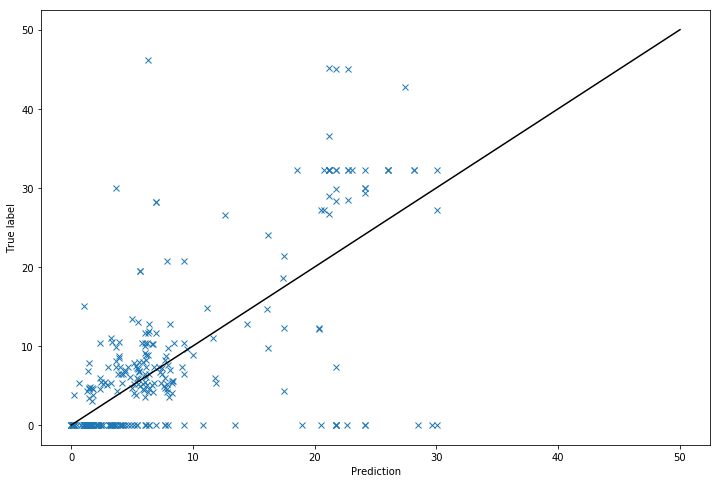

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

x = ['Length', 'TripID', 'MMSI']
y = ['Width']

predictions, ytest = knn_regression(static_data, x, y)
print('MAE: ' + str(mean_absolute_error(predictions, ytest)))

plt.figure(figsize = (12, 8))
pred = []
for element in predictions:
    pred.append(element[0])
plt.plot(pred, ytest, 'x')
            
x = np.linspace(0, 50, 50)
plt.plot(x, x, color = 'black')
    
plt.xlabel('Prediction')
plt.ylabel('True label')
plt.show()

In [15]:
# For beginner version: cell to hide

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
import ipywidgets as widgets
from ipywidgets import interact

attributes = []
attributes.append('')
for att in static_data.select_dtypes([np.number]).columns:
    attributes.append(att)

def plot_pred(att1, att2, att3, att4, att5):
    
    plt.figure(figsize = (12, 8))
    
    x = []
    title = 'Prediction of Width from '
    for att in [att1, att2, att3, att4, att5]:
        if att != '':
            x.append(att)
            title = title + str(att) + ' '
            
    y = ['Width']

    predictions, ytest = knn_regression(static_data, x, y)
    print('MAE: ' + str(mean_absolute_error(predictions, ytest)))
    
    pred = []
    for element in predictions:
        pred.append(element[0])
    plt.plot(pred, ytest, 'x')
            
    x = np.linspace(0, 50, 50)
    plt.plot(x, x, color = 'black')
    
    plt.xlabel('Prediction')
    plt.ylabel('True label')
    plt.title(title)

interact(plot_pred,
         att1 = widgets.Dropdown(options = static_data.select_dtypes([np.number]).columns,
                                 value = static_data.select_dtypes([np.number]).columns[0],
                                 description = 'x = [Att 1:',
                                 disabled = False,),
        att2 = widgets.Dropdown(options = attributes,
                                 value = attributes[0],
                                 description = '+ Att 2 (opt):',
                                 disabled = False,),
        att3 = widgets.Dropdown(options = attributes,
                                 value = attributes[0],
                                 description = '+ Att 3 (opt):',
                                 disabled = False,),
        att4 = widgets.Dropdown(options = attributes,
                                 value = attributes[0],
                                 description = '+ Att 4 (opt):',
                                 disabled = False,),
        att5 = widgets.Dropdown(options = attributes,
                                 value = attributes[0],
                                 description = '+ Att 5 (opt)]:',
                                 disabled = False,))

interactive(children=(Dropdown(description='x = [Att 1:', options=('TripID', 'MMSI', 'MeanSOG', 'VesselType', …

<function __main__.plot_pred(att1, att2, att3, att4, att5)>

Compare the following predictive models:
+ only ``Length``
+ ``Length`` and ``MMSI``
+ only ``MMSI``
+ only ``TripID``

As you can imagine, the attribute ``TripID``, having been artificially created only for organisation purpose, makes no sense in predicting the width of the ship. It is no surprising that it gives the worst performance.
The attribute ``Length`` is the best attribute to predict the width, which seems normal: by construction, the length and the width of a ship have to be more or less proportional. However, we see that adding the ``MMSI`` to the ``Length`` attribute pollutes the model and gives a worse performance.

In fact, when we remove the ``Length`` attribute, the prediction doesn't change: the ``MMSI`` attribute takes all the lead on the ``Length`` attribute for the prediction. This last point is mainly due to the model used, the KNN model being sensitive to the scale of the attributes (and ``MMSI`` is a very high number compared to ``Length``). But the choice of the model is outside of the scope of the course.

## Generalization

In general, it is important to carefully consider which attributes are chosen for the prediction: more attributes means more information, but it doesn't necessarily lead to better result, as the added information can be useless or even prejudicial for the prediction.

The attributes such as ``TripID``, ``MMSI`` or ``VesselTypes`` represent a code: they are not continuous variables, and as a consequence, should not be used a numerical attributes. If we used them as numerical attributes, we would give a meaning to their value (in the sense: a lower value means something different than a higher value), when in the real world, they are just codes: two close values of these attributes don't necessarily imply a close meaning, like it is the case for continuous variables, where two instances with close values for length can mean close values for width.

## Quiz

In [1]:
from IPython.display import IFrame
IFrame("https://h5p.org/h5p/embed/761741", "694", "600")